In [1]:
import yfinance as yf
df = yf.download(
    ["RELIANCE.NS", "HDFCBANK.NS", "TCS.NS", "INFY.NS"],
    period="10y",
    interval="1d",
    progress=False
)

/tmp/ipython-input-636794443.py:2: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(


In [2]:
df.shape

(2468, 20)

In [3]:
df.columns.to_list()

[('Close', 'HDFCBANK.NS'),
 ('Close', 'INFY.NS'),
 ('Close', 'RELIANCE.NS'),
 ('Close', 'TCS.NS'),
 ('High', 'HDFCBANK.NS'),
 ('High', 'INFY.NS'),
 ('High', 'RELIANCE.NS'),
 ('High', 'TCS.NS'),
 ('Low', 'HDFCBANK.NS'),
 ('Low', 'INFY.NS'),
 ('Low', 'RELIANCE.NS'),
 ('Low', 'TCS.NS'),
 ('Open', 'HDFCBANK.NS'),
 ('Open', 'INFY.NS'),
 ('Open', 'RELIANCE.NS'),
 ('Open', 'TCS.NS'),
 ('Volume', 'HDFCBANK.NS'),
 ('Volume', 'INFY.NS'),
 ('Volume', 'RELIANCE.NS'),
 ('Volume', 'TCS.NS')]

In [4]:
df = df[[('Close', 'HDFCBANK.NS'),
 ('Close', 'INFY.NS'),
 ('Close', 'RELIANCE.NS'),
 ('Close', 'TCS.NS')]]

In [5]:
df

Price            Close                                       
Ticker     HDFCBANK.NS      INFY.NS  RELIANCE.NS       TCS.NS
Date                                                         
2015-09-14  226.354889   430.459808   187.182419  1090.598633
2015-09-15  224.900909   430.244568   187.864944  1084.443848
2015-09-16  227.165085   431.203613   189.067566  1090.043701
2015-09-18  233.025421   432.299500   194.018784  1090.427734
2015-09-21  233.735764   432.377747   190.270187  1090.342285
...                ...          ...          ...          ...
2025-09-08  966.000000  1432.900024  1378.500000  3019.000000
2025-09-09  965.150024  1504.300049  1376.199951  3049.399902
2025-09-10  965.900024  1532.599976  1377.000000  3110.000000
2025-09-11  967.799988  1509.699951  1383.300049  3124.199951
2025-09-12  967.299988  1525.599976  1395.000000  3133.399902

[2468 rows x 4 columns]

In [6]:
df.columns = ['HDFCBANK', 'INFY', 'RELIANCE', 'TCS']
df.columns

Index(['HDFCBANK', 'INFY', 'RELIANCE', 'TCS'], dtype='object')

In [7]:
df

,HDFCBANK,INFY,RELIANCE,TCS
Date,,,,
2015-09-14,226.354889,430.459808,187.182419,1090.598633
2015-09-15,224.900909,430.244568,187.864944,1084.443848
2015-09-16,227.165085,431.203613,189.067566,1090.043701
2015-09-18,233.025421,432.299500,194.018784,1090.427734
2015-09-21,233.735764,432.377747,190.270187,1090.342285
...,...,...,...,...
2025-09-08,966.000000,1432.900024,1378.500000,3019.000000
2025-09-09,965.150024,1504.300049,1376.199951,3049.399902
2025-09-10,965.900024,1532.599976,1377.000000,3110.000000


In [8]:
import pandas as pd

# Reset index so 'Date' becomes a column
df = df.reset_index()

# Melt to long format
df_long = df.melt(id_vars=['Date'], var_name='Symbol', value_name='Price')

# If you want separate Date & Time columns (time will be 00:00 for daily data)
df_long['Time'] = pd.to_datetime(df_long['Date']).dt.time
df_long['Date'] = pd.to_datetime(df_long['Date']).dt.date

# Final format
df_final = df_long[['Date', 'Time', 'Price', 'Symbol']]

In [9]:
df

,Date,HDFCBANK,INFY,RELIANCE,TCS
0,2015-09-14,226.354889,430.459808,187.182419,1090.598633
1,2015-09-15,224.900909,430.244568,187.864944,1084.443848
2,2015-09-16,227.165085,431.203613,189.067566,1090.043701
3,2015-09-18,233.025421,432.299500,194.018784,1090.427734
4,2015-09-21,233.735764,432.377747,190.270187,1090.342285
...,...,...,...,...,...
2463,2025-09-08,966.000000,1432.900024,1378.500000,3019.000000
2464,2025-09-09,965.150024,1504.300049,1376.199951,3049.399902
2465,2025-09-10,965.900024,1532.599976,1377.000000,3110.000000
2466,2025-09-11,967.799988,1509.699951,1383.300049,3124.199951


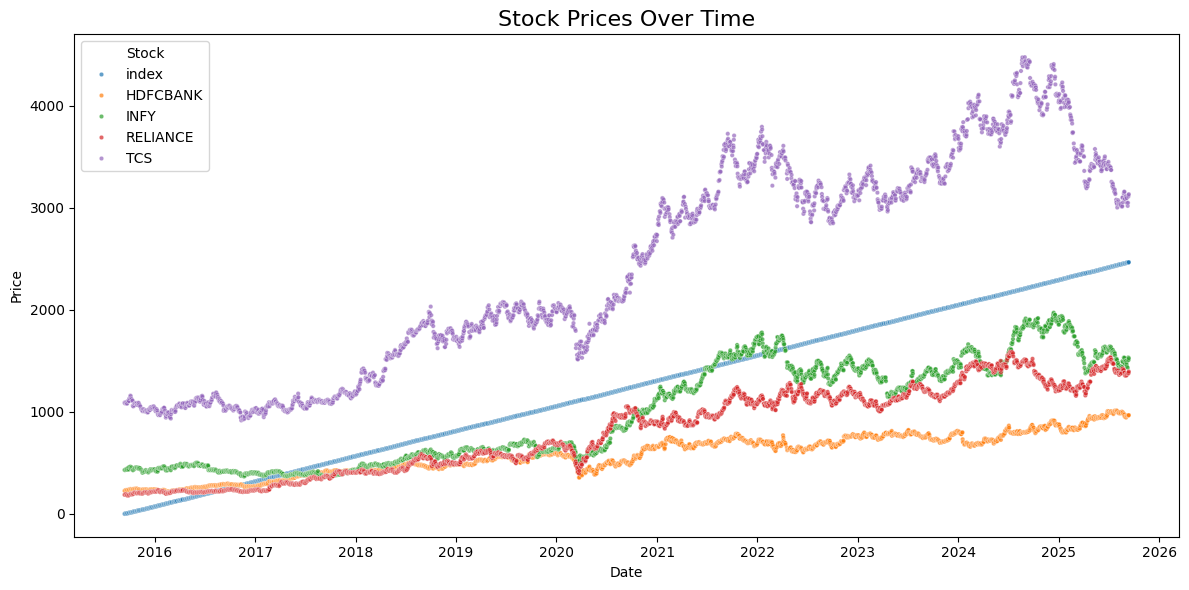

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reset index so Date becomes a column
df = df.reset_index()

# Melt into long format
df_long = df.melt(id_vars=['Date'], var_name='Symbol', value_name='Price')

# Scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_long, x='Date', y='Price', hue='Symbol', s=10, alpha=0.7)

# Beautify
plt.title("Stock Prices Over Time", fontsize=16)
plt.xlabel("Date")
plt.ylabel("Price")
plt.legend(title="Stock")
plt.tight_layout()
plt.show()

In [11]:
df.columns

Index(['index', 'Date', 'HDFCBANK', 'INFY', 'RELIANCE', 'TCS'], dtype='object')

In [12]:
df = df[['Date', 'RELIANCE']]

In [13]:
df

,Date,RELIANCE
0,2015-09-14,187.182419
1,2015-09-15,187.864944
2,2015-09-16,189.067566
3,2015-09-18,194.018784
4,2015-09-21,190.270187
...,...,...
2463,2025-09-08,1378.500000
2464,2025-09-09,1376.199951
2465,2025-09-10,1377.000000
2466,2025-09-11,1383.300049


<Axes: >

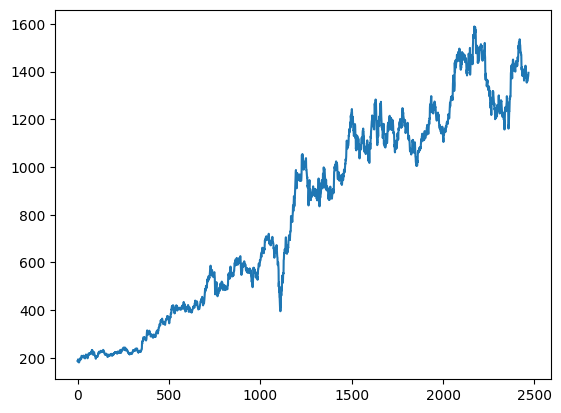

In [14]:
df['RELIANCE'].plot()

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose
results = seasonal_decompose(df['RELIANCE'], model='additive', period=365)

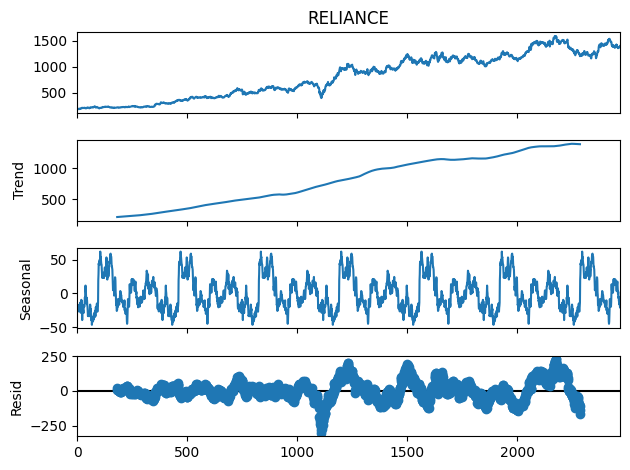

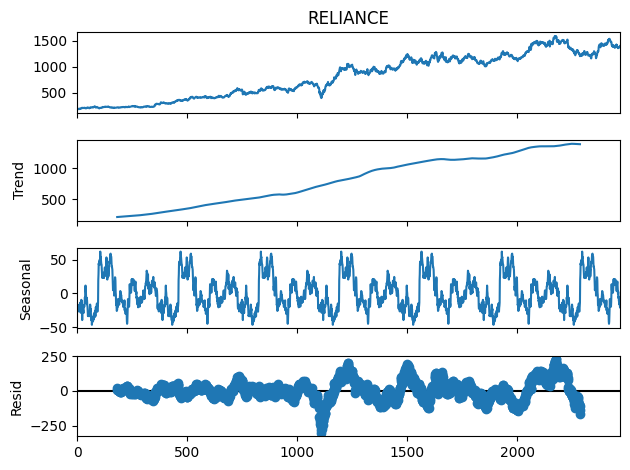

In [16]:
print(results)
results.plot()

In [17]:
len(df)

2468

In [18]:
2468-1975

493

In [19]:
train = df.iloc[:1975]
test = df.iloc[1975:]

In [20]:
from sklearn.preprocessing import MinMaxScaler

# Drop datetime columns (if you don’t need them for modeling)
train_num = train.select_dtypes(include=['number'])
test_num = test.select_dtypes(include=['number'])

scaler = MinMaxScaler()
scaler.fit(train_num)

scaled_train = scaler.transform(train_num)
scaled_test = scaler.transform(test_num)

In [21]:
scaled_train.shape, scaled_test.shape

((1975, 1), (493, 1))

In [22]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [23]:
n_input = 50
n_features = 1
generator = TimeseriesGenerator(scaled_train, scaled_train, length=n_input, batch_size=1)

In [24]:
generator[0]

(array([[[0.00574447],
         [0.00635576],
         [0.00743287],
         [0.01186735],
         [0.00850998],
         [0.00264902],
         [0.0031245 ],
         [0.00060159],
         [0.        ],
         [0.00126145],
         [0.00544364],
         [0.00590939],
         [0.01043123],
         [0.01238164],
         [0.01543824],
         [0.01064473],
         [0.0103051 ],
         [0.01115899],
         [0.01151803],
         [0.01333256],
         [0.01347815],
         [0.01563231],
         [0.0250835 ],
         [0.0237638 ],
         [0.02343391],
         [0.02356007],
         [0.02107596],
         [0.02043551],
         [0.01993094],
         [0.02071694],
         [0.02201721],
         [0.02436545],
         [0.02580156],
         [0.02271587],
         [0.01986304],
         [0.02292933],
         [0.02464684],
         [0.01717514],
         [0.0191741 ],
         [0.01941666],
         [0.01814552],
         [0.0150889 ],
         [0.01950399],
         [0

In [25]:
X, y = generator[0]
print(f'Given the Array: \n{X.flatten()}')
print(f'Predict this y: \n {y}')

Given the Array: 
[0.00574447 0.00635576 0.00743287 0.01186735 0.00850998 0.00264902
 0.0031245  0.00060159 0.         0.00126145 0.00544364 0.00590939
 0.01043123 0.01238164 0.01543824 0.01064473 0.0103051  0.01115899
 0.01151803 0.01333256 0.01347815 0.01563231 0.0250835  0.0237638
 0.02343391 0.02356007 0.02107596 0.02043551 0.01993094 0.02071694
 0.02201721 0.02436545 0.02580156 0.02271587 0.01986304 0.02292933
 0.02464684 0.01717514 0.0191741  0.01941666 0.01814552 0.0150889
 0.01950399 0.02185223 0.02319131 0.02589859 0.02996436 0.02810127
 0.02578217 0.02554929]
Predict this y: 
 [[0.02788782]]


In [26]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [27]:
model = Sequential()
model.add(LSTM(100, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [28]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 100)            │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 40,901 (159.77 KB)

 Trainable params: 40,901 (159.77 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
model.fit(generator, epochs=50)

Epoch 1/50


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1925/1925 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - loss: 0.0194
Epoch 2/50
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 7.5721e-04
Epoch 3/50
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - loss: 5.1170e-04
Epoch 4/50
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 3.6333e-04
Epoch 5/50
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 3.8495e-04
Epoch 6/50
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - loss: 2.7546e-04
Epoch 7/50
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2.6331e-04
Epoch 8/50
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 2.3872e-04
Epoch 9/50
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 2.4079e-04
Epoch 10/50
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - loss: 2.3711e-04
Epoch 11/50
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - loss: 2.1974e-04
Epoch 12/50
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - loss: 2.0917e-04
Epoch 13/50
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - loss: 2.3740e-04
Epoch 14/50
1925/1925 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - l

In [30]:
last_train_batch = scaled_train[-n_input:]

In [31]:
last_train_batch

array([[0.89478137],
       [0.91696168],
       [0.91485608],
       [0.95633441],
       [0.96845686],
       [0.96970388],
       [0.95958469],
       [0.95864445],
       [0.98154021],
       [0.9912505 ],
       [1.        ],
       [0.99859281],
       [0.96266858],
       [0.93992249],
       [0.93921381],
       [0.95710934],
       [0.94669977],
       [0.95784043],
       [0.96731971],
       [0.95135091],
       [0.93945751],
       [0.93482846],
       [0.94973402],
       [0.95606852],
       [0.9493354 ],
       [0.95666644],
       [0.96164984],
       [0.96638942],
       [0.9797227 ],
       [0.97879252],
       [0.96233632],
       [0.97066413],
       [0.95830618],
       [0.95803942],
       [0.95928414],
       [0.94043623],
       [0.93534646],
       [0.9244109 ],
       [0.9140091 ],
       [0.91298675],
       [0.90807464],
       [0.91058607],
       [0.9097193 ],
       [0.9154539 ],
       [0.91772087],
       [0.91918775],
       [0.92638913],
       [0.938

In [32]:
last_train_batch = last_train_batch.reshape((1, n_input, n_features))

In [33]:
model.predict(last_train_batch)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 407ms/step


array([[0.92198265]], dtype=float32)

In [34]:
test_predictions = []

first_eval_batch = scaled_train[-n_input:]
current_batch = first_eval_batch.reshape((1, n_input, n_features))

In [35]:
import numpy as np
for i in range(len(test)):
  current_pred = model.predict(current_batch)[0]
  print(current_pred)

  test_predictions.append(current_pred)
  current_batch = np.append(current_batch[:, 1:, :], [[current_pred]], axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[0.92198265]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[0.91666603]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0.9093847]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[0.9037012]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[0.89803034]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0.89263725]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[0.88737863]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0.8822486]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
[0.8772266]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0.8723051]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[0.86747843]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
[0.86274266]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0.8580949]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0.85353225]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[0.8490523]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[0.8446527]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0.84033126]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[0.83608586]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
[0.8319143]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
[0

In [36]:
len(test_predictions)

493

In [37]:
true_predictions = scaler.inverse_transform(test_predictions)

In [38]:
test['Predictions'] = true_predictions[:len(test)]

/tmp/ipython-input-3864574532.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Predictions'] = true_predictions[:len(test)]


In [39]:
test

,Date,RELIANCE,Predictions
1975,2023-09-14,1217.637695,1210.186490
1976,2023-09-15,1219.895996,1204.250349
1977,2023-09-18,1209.274658,1196.120582
1978,2023-09-20,1182.324097,1189.774759
1979,2023-09-21,1173.712769,1183.443110
...,...,...,...
2463,2025-09-08,1378.500000,332.870617
2464,2025-09-09,1376.199951,331.638424
2465,2025-09-10,1377.000000,330.410657
2466,2025-09-11,1383.300049,329.187348


<Axes: >

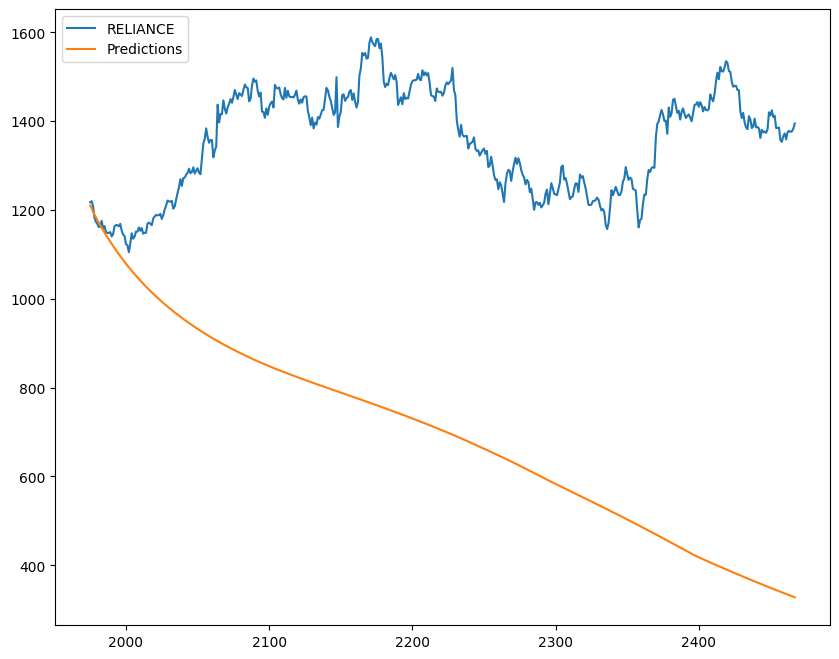

In [40]:
test[['RELIANCE','Predictions']].plot(figsize=(10,8))

In [41]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_absolute_error

mse = mean_absolute_error(test['RELIANCE'], test['Predictions'])
r2 = r2_score(test['RELIANCE'], test['Predictions'])
mae = mean_absolute_error(test['RELIANCE'], test['Predictions'])

In [42]:
print(mse)
print(r2)
print(mae)

658.5204015370322
-36.01317453113398
658.5204015370322


In [44]:
train.tail(1)

,Date,RELIANCE
1974,2023-09-13,1216.520996


In [43]:
test.head(10)

,Date,RELIANCE,Predictions
1975,2023-09-14,1217.637695,1210.186490
1976,2023-09-15,1219.895996,1204.250349
1977,2023-09-18,1209.274658,1196.120582
1978,2023-09-20,1182.324097,1189.774759
1979,2023-09-21,1173.712769,1183.443110
1980,2023-09-22,1168.823975,1177.421585
1981,2023-09-25,1161.627319,1171.550198
1982,2023-09-26,1162.644775,1165.822359
1983,2023-09-27,1175.747803,1160.215176
1984,2023-09-28,1158.475708,1154.720196
